<h1> Homework Questions for Session 2 Regression </h1>  

 [Link to Session 2 Homework Questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md)

<h2> Dataset </h2>

Data is from California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [ ]:
import wget
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = wget.download(url)
filename

<h2> Exploratory Data Analysis </h2>

<u> Goal: </u>    

Create regression model for prediction of housing prices `'median_house_value'`

In [45]:
#Load dataset
import pandas as pd
import numpy as np

df1= pd.read_csv('housing.csv')
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [47]:
for col in df1.columns:
    print(col)
    print(df1[col].unique()[:5])

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
latitude
[37.88 37.86 37.85 37.84 37.83]
housing_median_age
[41. 21. 52. 42. 50.]
total_rooms
[ 880. 7099. 1467. 1274. 1627.]
total_bedrooms
[ 129. 1106.  190.  235.  280.]
population
[ 322. 2401.  496.  558.  565.]
households
[ 126. 1138.  177.  219.  259.]
median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
median_house_value
[452600. 358500. 352100. 341300. 342200.]
ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


<Axes: xlabel='median_house_value', ylabel='Count'>

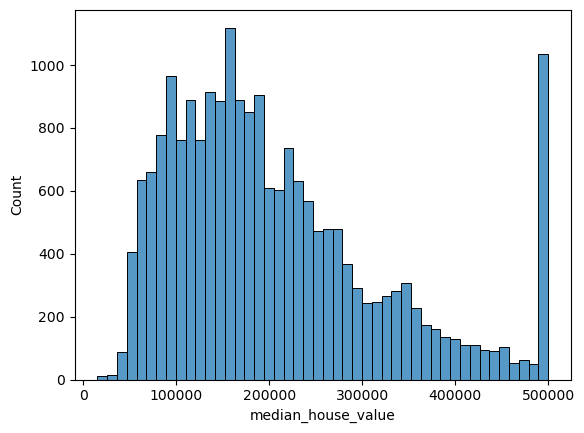

In [50]:
#Distribution of median_house_value
import matplotlib as plt
import seaborn as sns
%matplotlib inline

sns.histplot(df1.median_house_value)

<u> Prepare the dataset </u>

In [51]:
#Keep data for ocean_proximity is either '<1H OCEAN' or 'INLAND' & reset index
df1_ocean = df1[(df1['ocean_proximity'] =='<1H OCEAN') | (df1['ocean_proximity'] =='INLAND')]
df_ocean = df1_ocean.reset_index()

In [52]:
#Select first 5 rows
df_ocean.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [53]:
for col in df_ocean.columns:
    print(col)
    print(df_ocean[col].unique()[:5])

index
[701 830 859 860 861]
longitude
[-121.97 -121.99 -121.96 -121.98 -122.  ]
latitude
[37.64 37.61 37.57 37.58 37.49]
housing_median_age
[32.  9. 21. 15. 20.]
total_rooms
[1283. 3666. 4342. 3575. 4126.]
total_bedrooms
[ 194.  711.  783.  597. 1031.]
population
[ 485. 2341. 2172. 1777. 2079.]
households
[171. 703. 789. 559. 975.]
median_income
[6.0574 4.6458 4.6146 5.7192 3.6832]
median_house_value
[431000. 217000. 247600. 283500. 216900.]
ocean_proximity
['<1H OCEAN' 'INLAND']


In [54]:
#Prepare dataset
df = df_ocean[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income', 
               'median_house_value']]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


<h2> Question 1 </h2>

In [55]:
#Summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [56]:
#Find missing values
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

`Answer: total_bedrooms`

<h2> Question 2 </h2>

In [57]:
#Dataset Information
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


`Answer: 1195`

<u> Prepare and split the dataset </u>  

In [59]:
#Set up Validation Framework
#train/val/test: 60%/20%/20%

n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_val - n_test

In [60]:
#Check Dataset 
n, n_train + n_val + n_test

(15687, 15687)

In [61]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [62]:
#Shuffle Dataset
import random

np.random.seed(42) #shuffle with seed so results are reproducible
idx = np.arange(n)
np.random.shuffle(idx)

In [63]:
#Split dataset per shuffle
#first record to end record
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]] 
df_test = df.iloc[idx[n_train + n_val:]]

In [64]:
#Check datasets
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [65]:
#Reset Train,Validation,Test Data Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [66]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [67]:
#Apply Log Transformation on median_house_value

y_train=np.log1p(df_train.median_house_value.values)
y_val=np.log1p(df_val.median_house_value.values)
y_test=np.log1p(df_test.median_house_value.values)

In [68]:
#Delete column of previous unused Log Transformation column

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [69]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [70]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [71]:
#Check Length of y_train dataset
len(y_train)

9413

<h2> Question 3 </h2>

In [72]:
#List all columns
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [73]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

In [74]:
#Training Linear Regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [75]:
#Define RMSE Score
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [76]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [77]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

<u> Case 1: Replace Missing Values with 0 </u>

In [78]:
#Print all Missing Values
print("Total NA Sum (Before Fill with 0) = ",df_train1.total_bedrooms.isna().sum())
df_train1.total_bedrooms= df_train1.total_bedrooms.fillna(0)
print("Total NA Sum (After Fill with 0) ",df_train1.total_bedrooms.isna().sum())

Total NA Sum (Before Fill with 0) =  94
Total NA Sum (After Fill with 0)  0


In [79]:
#Missing Values with 0
X_train1 = df_train1.fillna(0).values

w0_1, w_1 = train_linear_regression(X_train1, y_train)

y_pred_1 = w0_1 + X_train1.dot(w_1)

In [80]:
w0_1, y_pred_1

(-9.763249477929213,
 array([11.48901968, 12.14856943, 12.45852739, ..., 12.91332356,
        11.93076692, 12.11614341]))

<Axes: ylabel='Count'>

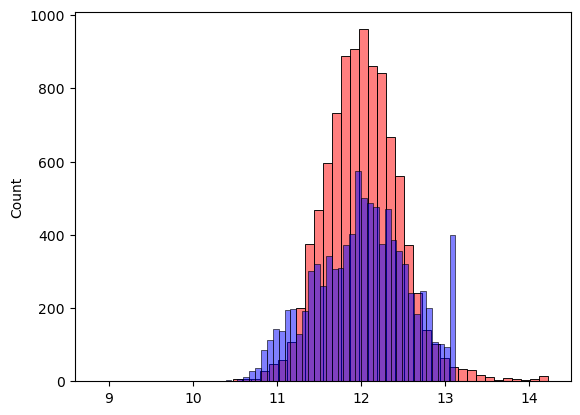

In [81]:
#Distribution of Training vs Prediction
sns.histplot(y_pred_1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [82]:
#RMSE Score of Training Dataset
round(rmse(y_train, y_pred_1),2)

0.34

In [83]:
#RMSE Score of Validation Dataset
X_val = prepare_X(df_val)
y_pred_11 = w0_1 + X_val.dot(w_1)
round(rmse(y_val, y_pred_11),2)

0.34

<u> Case 2: Replace Missing Values with Mean </u>

In [84]:
print("Total NA Sum (Before Fill with Mean)  = ",df_train2.total_bedrooms.isna().sum())
df_train2.total_bedrooms = df_train2.total_bedrooms.fillna(df_train2.total_bedrooms.mean())
print("Total NA Sum (After Fill with Mean)= ",df_train2.total_bedrooms.isna().sum())

Total NA Sum (Before Fill with Mean)  =  94
Total NA Sum (After Fill with Mean)=  0


In [86]:
#Replace Missing Values with Mean
X_train2 = df_train2.fillna(df_train2.total_bedrooms.mean()).values

w0_2, w_2 = train_linear_regression(X_train2, y_train)

y_pred_2 = w0_2 + X_train2.dot(w_2)

In [87]:
w0_2, y_pred_2

(-9.886133215861097,
 array([11.48148474, 12.14204505, 12.45148382, ..., 12.9139426 ,
        11.93466055, 12.11281089]))

<Axes: ylabel='Count'>

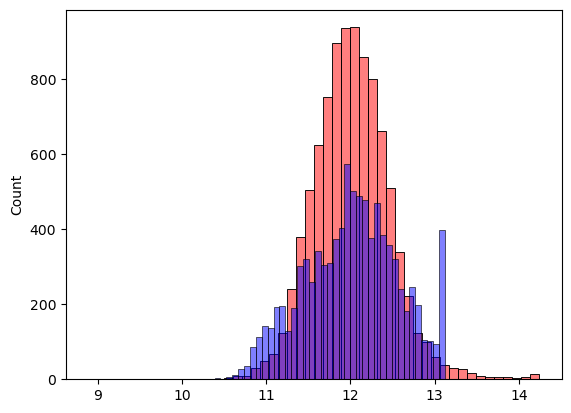

In [88]:
#Distribution of Training vs Prediction
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [89]:
#RMSE Score of Training Dataset
round(rmse(y_train, y_pred_2),2)

0.34

In [90]:
#RMSE Score of Validation Dataset
X_val = prepare_X(df_val)
y_pred_22 = w0_2 + X_val.dot(w_2)
round(rmse(y_val, y_pred_22),2)

0.34

`Answer: Both are equally good`

<h2> Question 4 </h2>

<u> Train Regularized Linear Regression </u>

In [92]:
df_train3.total_bedrooms = df_train3.total_bedrooms.fillna(0)
df_train3.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [94]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [95]:
#Case r=0
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [96]:
#Case r= 0.000001
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.000001
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.000001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [97]:
#Case r= 0.0001
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.0001
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.0001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [107]:
#Case r= 0.001
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.001
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [106]:
#Case r= 0.01
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.01
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.01)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [100]:
#Case r= 0.1
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.1
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [101]:
#Case r= 1
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 1
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [102]:
#Case r= 5
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 5
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=5)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.35

In [103]:
#Case r= 10
X_train3 = prepare_X(df_train3)

# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 10
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=10)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.35

`Answer: 0.001`

<h2> Question 5 </h2>

In [110]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
rmse_scores =[]

In [131]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    #Split dataset using seed(42)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    #Reset Index of Training,Validation,Test Dataset
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    #Log Transformation of median_house_value
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    

    #Train 
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    #Validation
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    
    #RMSE Score
    score = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    rmse_scores.append(score)
    
    print('seed=  {} , rmse score = {}'.format(s,score))

seed=  0 , rmse score = 0.33
seed=  1 , rmse score = 0.34
seed=  2 , rmse score = 0.33
seed=  3 , rmse score = 0.33
seed=  4 , rmse score = 0.34
seed=  5 , rmse score = 0.34
seed=  6 , rmse score = 0.33
seed=  7 , rmse score = 0.35
seed=  8 , rmse score = 0.35
seed=  9 , rmse score = 0.34


In [128]:
#RMSE Score
std = np.std(rmse_scores)
print(' STD of RMSE Scores = {}'.format(round(std,3)))

 STD of RMSE Scores = 0.007


`Answer: 0.005`

<h2> Question 6 </h2>

In [132]:
#Split dataset using seed(9)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [133]:
#Combine Train and Validation dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])


In [134]:
#RMSE Score of Test dataset
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)

0.33

`Answer: 0.33`